In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib as plt

## INTENTO 6


In [2]:
dfbesttry = pd.read_csv('../Nacho/try11_data.csv')

In [3]:
df5 = pd.read_csv('../df_cleaned.csv')

In [4]:
df5.drop(columns='Unnamed: 0',inplace=True)

In [5]:
df5.describe()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,916.000000,916.000000,916.00000,916.000000,857.000000,886.000000,827.000000,914.000000,861.000000,861.000000,854.000000,608.000000,308.000000,433.000000,732.000000
mean,310.460699,53.528384,0.78821,3.255459,132.142357,199.146727,0.165659,0.603939,137.533101,0.390244,0.875878,1.769737,0.678571,5.085450,1.132514
std,219.894251,9.397376,0.40880,0.925783,19.059506,110.762998,0.371999,0.805666,25.939337,0.488088,1.089846,0.617914,0.936378,1.920792,1.257615
min,0.000000,28.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,114.000000,47.000000,1.00000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,273.500000,54.000000,1.00000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,502.250000,60.000000,1.00000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,731.000000,77.000000,1.00000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [6]:
df5.drop('index', axis=1, inplace=True)

In [7]:
df5.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0


In [8]:
media_thalach = df5['thalach'].mean()

# Rellenar los NaN con la media calculada
df5['thalach'].fillna(value=media_thalach, inplace=True)

# Mostrar los primeros registros para verificar el resultado
print(df5[['thalach']].head())

   thalach
0    125.0
1    150.0
2    149.0
3    140.0
4    111.0


In [9]:
print(df5[df5['oldpeak']< 0].value_counts(df5['oldpeak']))

oldpeak
-1.0    2
-0.5    2
-2.6    1
-2.0    1
-1.5    1
-1.1    1
-0.9    1
-0.8    1
-0.7    1
-0.1    1
dtype: int64


In [10]:
df5['oldpeak'] = df5['oldpeak'].abs()

In [11]:
print(df5[df5['oldpeak'] >= 0].value_counts(df5['oldpeak']))

oldpeak
0.0    369
1.0     85
2.0     77
1.5     49
3.0     27
0.5     21
1.2     17
2.5     16
0.8     16
1.4     15
1.6     14
0.6     14
0.2     14
1.8     12
0.1     10
0.4     10
4.0      8
2.6      8
2.8      7
1.3      5
1.1      5
1.9      5
0.3      5
0.9      5
2.2      5
0.7      5
2.4      4
3.6      4
3.4      3
4.2      2
3.5      2
2.1      2
3.2      2
1.7      2
3.1      1
2.9      1
3.7      1
3.8      1
2.3      1
4.4      1
5.0      1
5.6      1
6.2      1
dtype: int64


In [12]:
df5.drop(columns='ca',inplace=True)

In [13]:
print(df5.isnull().sum())

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          89
restecg       2
thalach       0
exang        55
oldpeak      62
slope       308
thal        483
label       184
dtype: int64


In [14]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN
df5.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols4 = ['oldpeak']
categorical_cols4 = ['fbs', 'restecg', 'exang', 'slope']

# Imputación para variables numéricas (usando la mediana)
numeric_imputer3 = SimpleImputer(strategy='mean')
df5[numeric_cols4] = numeric_imputer3.fit_transform(df5[numeric_cols4])

# Imputación para variables categóricas (usando la moda)
categorical_imputer3 = SimpleImputer(strategy='most_frequent')
df5[categorical_cols4] = categorical_imputer3.fit_transform(df5[categorical_cols4])

# Verificar que ya no hay valores faltantes
print(df5.isnull().sum())

# El DataFrame 'df' ahora contiene los valores imputados


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
thal        483
label       184
dtype: int64


In [15]:
# Función para categorizar los valores de chol
def categorizar_chol(valor):
    if valor == 0 or pd.isnull(valor):  
        return 0
    elif valor < 200:
        return 1
    elif 200 <= valor <= 239:
        return 2
    else:  # valor >= 240
        return 3

# Aplicar la función al DataFrame
df5['chol'] = df5['chol'].apply(categorizar_chol)

# Mostrar los primeros registros para verificar el resultado
print(df5['chol'].head())


0    2
1    2
2    0
3    0
4    2
Name: chol, dtype: int64


In [16]:
def sust_thal(valor):
    if pd.isnull(valor):
        return 0
    else:
        return valor

df5['thal'] = df5['thal'].apply(sust_thal)
print(df5['thal'].head())

0    3.0
1    7.0
2    0.0
3    0.0
4    7.0
Name: thal, dtype: float64


In [17]:
def categorizar_trestbps(valor):
    if pd.isnull(valor):
        return 0
    elif valor < 120:
        return 1
    elif 120 <= valor <= 129:
        return 2
    else:  # valor >= 130
        return 3


df5['trestbps'] = df5['trestbps'].apply(categorizar_trestbps)

# Mostrar los primeros registros para verificar el resultado
print(df5['trestbps'].head())


0    2
1    2
2    3
3    3
4    3
Name: trestbps, dtype: int64


In [18]:
df5.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
thal          0
label       184
dtype: int64

In [19]:
df5.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,label
0,51,1,1,2,2,0.0,2.0,125.0,1.0,1.4,1.0,3.0,0.0
1,54,1,3,2,2,0.0,0.0,150.0,1.0,1.5,2.0,7.0,2.0
2,63,1,4,3,0,0.0,2.0,149.0,0.0,2.0,1.0,0.0,2.0
3,52,0,2,3,0,0.0,0.0,140.0,0.0,0.0,2.0,0.0,0.0
4,55,1,4,3,2,0.0,0.0,111.0,1.0,5.6,3.0,7.0,3.0


In [20]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler3 = StandardScaler()

# Lista de columnas a estandarizar
columns_to_scale3 = ['age','oldpeak', 'thalach']

# Ajustar el escalador solo a las columnas especificadas y transformarlas
df5[columns_to_scale3] = scaler3.fit_transform(df5[columns_to_scale3])


In [21]:
from sklearn.preprocessing import OrdinalEncoder

# Inicializar el codificador ordinal
ordinal_encoder = OrdinalEncoder()

# Variables para codificación ordinal
ordinal_vars = ["slope", "thal", "restecg"]

# Aplicar codificación ordinal
df5[ordinal_vars] = ordinal_encoder.fit_transform(df5[ordinal_vars])

df5.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,label
0,-0.269199,1,1,2,2,0.0,2.0,-0.498653,1.0,0.480939,0.0,1.0,0.0
1,0.050213,1,3,2,2,0.0,0.0,0.496019,1.0,0.578220,1.0,3.0,2.0
2,1.008451,1,4,3,0,0.0,2.0,0.456232,0.0,1.064627,0.0,0.0,2.0
3,-0.162728,0,2,3,0,0.0,0.0,0.098150,0.0,-0.881000,1.0,0.0,0.0
4,0.156684,1,4,3,2,0.0,0.0,-1.055669,1.0,4.566755,2.0,3.0,3.0


In [22]:
df5

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,label
0,-0.269199,1,1,2,2,0.0,2.0,-0.498653,1.0,0.480939,0.0,1.0,0.0
1,0.050213,1,3,2,2,0.0,0.0,0.496019,1.0,0.578220,1.0,3.0,2.0
2,1.008451,1,4,3,0,0.0,2.0,0.456232,0.0,1.064627,0.0,0.0,2.0
3,-0.162728,0,2,3,0,0.0,0.0,0.098150,0.0,-0.881000,1.0,0.0,0.0
4,0.156684,1,4,3,2,0.0,0.0,-1.055669,1.0,4.566755,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.050213,1,4,3,1,0.0,0.0,0.177724,1.0,1.064627,1.0,0.0,NaN
912,0.156684,1,2,1,2,1.0,1.0,1.689624,0.0,0.000000,1.0,0.0,NaN
913,1.434334,1,3,3,2,0.0,2.0,0.496019,0.0,-0.102749,1.0,3.0,NaN
914,0.582567,1,1,3,3,0.0,2.0,0.854100,0.0,-0.686437,1.0,3.0,NaN


In [23]:
train_end5 = df5[0:732]
test_end5 = df5[(916-184):]

In [24]:
train_end5.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
label       0
dtype: int64

In [25]:
test_end5.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
thal          0
label       184
dtype: int64

In [26]:
train_end5['label'].value_counts()

0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: label, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

X5 = train_end5.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y5 = train_end5['label']

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X5_train, X5_val, Y5_train, Y5_val = train_test_split(X5, Y5, test_size=0.125, random_state=42)



In [28]:
from imblearn.over_sampling import SMOTE

# Crear un objeto SMOTE
smote3 = SMOTE(random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento
X5_train_smote, Y5_train_smote = smote3.fit_resample(X5_train, Y5_train)

# Ahora, X1_train_smote y Y1_train_smote son tus nuevas características y etiquetas de entrenamiento, respectivamente,
# con las clases minoritarias sobremuestreadas.


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

# Espacio de parámetros para cada modelo
model_params3 = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9]
        }
    },
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }
    }
}

# Nota: La regresión lineal no tiene hiperparámetros que suelan ajustarse en el sentido tradicional, por lo que no se incluye en el Grid Search.


In [30]:
from sklearn.model_selection import train_test_split

# Supongamos que ya has aplicado SMOTE a tus datos de entrenamiento y los tienes en X1_train_smote, Y1_train_smote

# Ejemplo con KNN
grid_search3 = GridSearchCV(model_params3['KNN']['model'], model_params3['KNN']['params'], cv=5, return_train_score=False)
grid_search3.fit(X5_train_smote, Y5_train_smote)

# Resultados
(grid_search3.best_params_ ,grid_search3.best_score_)

({'n_neighbors': 3}, 0.7633802816901409)

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Para demostrar el proceso, ejecutaremos GridSearchCV solo para Random Forest debido a limitaciones del entorno de ejecución
model_to_run4 = 'Random_Forest'
model4 = model_params3[model_to_run4]['model']
params4 = model_params3[model_to_run4]['params']

grid_search4 = GridSearchCV(model4, params4, cv=5, return_train_score=False)
grid_search4.fit(X5_train_smote, Y5_train_smote)

# Mejores parámetros y mejor puntuación - como ejemplo, esto no se ejecutará, solo para ilustración
best_params4 = grid_search4.best_params_
best_score4 = grid_search4.best_score_
(best_params4, best_score4)



({'max_depth': 20, 'n_estimators': 50}, 0.8147887323943662)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Asegúrate de definir model_params correctamente como se mostró anteriormente

# Corregimos aquí para ejecutar GridSearchCV para la Regresión Logística
model_to_run5 = 'Logistic_Regression'
model5 = model_params3[model_to_run5]['model']  # Usamos model_to_run2
params5 = model_params3[model_to_run5]['params']

# Crear el objeto GridSearchCV para Regresión Logística
grid_search5 = GridSearchCV(model5, params5, cv=5, return_train_score=False)

# Reemplaza X1_train_smote, Y1_train_smote con tus datos reales de entrenamiento
grid_search5.fit(X5_train_smote, Y5_train_smote)

# Obtener los mejores parámetros y la mejor puntuación
best_params5 = grid_search5.best_params_
best_score5 = grid_search5.best_score_

(best_params5, best_score5)


c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

({'C': 10}, 0.476056338028169)

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo de Random Forest con los parámetros seleccionados
rf_model5 = RandomForestClassifier(max_depth=30, n_estimators=100, random_state=42)

# Entrenar el modelo con tus datos de entrenamiento
rf_model5.fit(X5_train_smote, Y5_train_smote)

# El modelo ahora está entrenado y listo para hacer predicciones o para ser evaluado en tu conjunto de validación o prueba


RandomForestClassifier(max_depth=30, random_state=42)

In [34]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de validación
Y5_val_pred = rf_model5.predict(X5_val)

# Calcular la precisión
accuracy = accuracy_score(Y5_val, Y5_val_pred)

print(f"La precisión del modelo en el conjunto de validación es: {accuracy}")


La precisión del modelo en el conjunto de validación es: 0.4782608695652174


In [35]:
from sklearn.metrics import f1_score

f1 = f1_score(Y5_val, Y5_val_pred, average='micro')  

print(f"El F1-score del modelo en el conjunto de validación es: {f1}")


El F1-score del modelo en el conjunto de validación es: 0.4782608695652174


In [36]:
# Excluyendo la columna 'label'
test_end5_sin_label = test_end5.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones4 = rf_model5.predict(test_end5_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades4 = rf_model5.predict_proba(test_end5_sin_label)



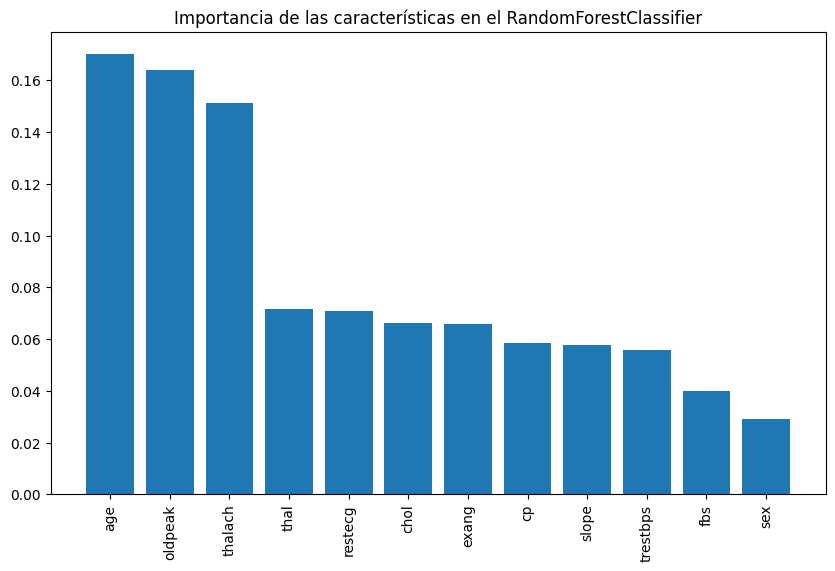

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancias = rf_model5.feature_importances_

# Ordenar las importancias en orden descendente
indices = np.argsort(importancias)[::-1]

# Nombres de las características ordenadas por importancia
nombres_caracteristicas = [test_end5_sin_label.columns[i] for i in indices]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características en el RandomForestClassifier")
plt.bar(range(test_end5_sin_label.shape[1]), importancias[indices], align="center")
plt.xticks(range(test_end5_sin_label.shape[1]), nombres_caracteristicas, rotation=90)
plt.xlim([-1, test_end5_sin_label.shape[1]])
plt.show()


In [38]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df5 = test_end5.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df5['label'] = predicciones4

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df5.head())



          age  sex  cp  trestbps  chol  fbs  restecg   thalach  exang  \
732  0.369626    1   4         3     1  0.0      2.0 -0.737374    1.0   
733 -0.162728    1   2         3     1  0.0      0.0  1.092822    0.0   
734 -0.588612    1   2         1     0  0.0      0.0 -1.493324    0.0   
735  0.901980    1   4         1     0  0.0      0.0 -0.379292    1.0   
736 -0.269199    1   3         1     1  0.0      0.0 -0.578226    0.0   

      oldpeak  slope  thal  label  
732  2.037440    2.0   0.0    4.0  
733 -0.881000    1.0   0.0    0.0  
734 -0.881000    1.0   0.0    0.0  
735  1.551034    2.0   0.0    4.0  
736 -0.297312    0.0   1.0    1.0  


In [39]:
predicted_df5

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,label
732,0.369626,1,4,3,1,0.0,2.0,-0.737374,1.0,2.037440,2.0,0.0,4.0
733,-0.162728,1,2,3,1,0.0,0.0,1.092822,0.0,-0.881000,1.0,0.0,0.0
734,-0.588612,1,2,1,0,0.0,0.0,-1.493324,0.0,-0.881000,1.0,0.0,0.0
735,0.901980,1,4,1,0,0.0,0.0,-0.379292,1.0,1.551034,2.0,0.0,4.0
736,-0.269199,1,3,1,1,0.0,0.0,-0.578226,0.0,-0.297312,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.050213,1,4,3,1,0.0,0.0,0.177724,1.0,1.064627,1.0,0.0,2.0
912,0.156684,1,2,1,2,1.0,1.0,1.689624,0.0,0.000000,1.0,0.0,0.0
913,1.434334,1,3,3,2,0.0,2.0,0.496019,0.0,-0.102749,1.0,3.0,0.0
914,0.582567,1,1,3,3,0.0,2.0,0.854100,0.0,-0.686437,1.0,3.0,0.0


In [40]:
predicted_df5['label'].value_counts()

0.0    88
3.0    38
2.0    27
1.0    23
4.0     8
Name: label, dtype: int64

In [41]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df5.reset_index(drop=True, inplace=True)
predicted_df5['ID'] = predicted_df5.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf3 = predicted_df5[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf3.to_csv('try36_data.csv', index=False)


In [42]:
dfactualtry = pd.read_csv('try36_data.csv')

In [43]:
difference = dfbesttry['label'].compare(dfactualtry['label'])
difference = difference[difference['self']!= difference ['other']]

print(difference)

     self  other
0     2.0    4.0
3     1.0    4.0
4     0.0    1.0
6     0.0    1.0
7     2.0    1.0
14    0.0    1.0
20    1.0    4.0
21    1.0    3.0
22    0.0    1.0
29    0.0    4.0
31    0.0    3.0
39    2.0    0.0
40    0.0    2.0
43    2.0    3.0
46    3.0    1.0
52    2.0    4.0
53    1.0    3.0
54    1.0    2.0
56    0.0    2.0
57    1.0    2.0
59    0.0    1.0
61    1.0    3.0
62    1.0    2.0
68    1.0    2.0
78    0.0    2.0
83    1.0    2.0
85    1.0    3.0
87    2.0    3.0
90    0.0    3.0
97    2.0    3.0
98    1.0    0.0
99    2.0    3.0
104   2.0    4.0
107   1.0    3.0
109   0.0    1.0
112   1.0    3.0
113   0.0    3.0
115   1.0    2.0
116   1.0    3.0
117   0.0    4.0
119   1.0    3.0
125   1.0    3.0
126   0.0    2.0
138   3.0    2.0
140   1.0    2.0
142   0.0    3.0
148   3.0    2.0
150   1.0    2.0
160   3.0    2.0
164   1.0    3.0
166   3.0    4.0
172   0.0    1.0


In [44]:
total_diferencias = len(difference)

print(f"Total de entradas diferentes: {total_diferencias}")

Total de entradas diferentes: 52


: 